<a href="https://colab.research.google.com/github/puraminy/mini_proj2/blob/master/Fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load DATA


#### Data Main Source
#####https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [10]:
!git clone "https://github.com/puraminy/mini_proj2"

fatal: destination path 'mini_proj2' already exists and is not an empty directory.


In [11]:
import numpy as np
import pandas as pd

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"

#github = "https://raw.githubusercontent.com/puraminy/mini_proj2/master/polution.csv"

github = "mini_proj2/polution.csv"

c=pd.read_csv(github)
data=np.asarray(c)
print(data)
np.shape(data)

[[0.12977867 0.35294122 0.24590163 ... 0.00229001 0.         0.        ]
 [0.14889336 0.36764708 0.24590163 ... 0.00381099 0.         0.        ]
 [0.15995975 0.42647061 0.22950819 ... 0.00533197 0.         0.        ]
 ...
 [0.01006036 0.2647059  0.26229507 ... 0.40558836 0.         0.        ]
 [0.01006036 0.2647059  0.26229507 ... 0.41399646 0.         0.        ]
 [0.00804829 0.2647059  0.24590163 ... 0.42086649 0.         0.        ]]


(43799, 8)

In [0]:
from matplotlib import pyplot
values = c.values
# specify columns to plot
def plot_trends():
  groups = [0, 1, 2, 3, 5, 6, 7]
  i = 1
  # plot each column
  pyplot.figure()
  for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(c.columns[group], y=0.5, loc='right')
    i += 1
  pyplot.show()

# Preparing Time Series

In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


# load dataset
def create_data(n_hours = 24, n_train = 10000):
#   dataset = read_csv('mini_proj2/polution.csv', header=0)
#   values = dataset.values

  data = [[i+x for x in range(8)] for i in range(1,40001)]#[[i]*8 for i in range(1,40001)]
  values = np.asarray(data)
  
  print(np.shape(values))
  # integer encode direction
#   encoder = LabelEncoder()
#   values[:,4] = encoder.fit_transform(values[:,4])
  # ensure all data is float
  values = values.astype('float32')
  # normalize features
  # scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = values # scaler.fit_transform(values)
  # specify the number of lag hours
  # n_hours = 24
  n_features = 8 
  # frame as supervised learning
  reframed = series_to_supervised(scaled, n_hours, 1)

 # print(reframed[:2])
 # print(reframed.shape)

  # split into train and test sets
  values = reframed.values
   #365 * 24
  train = values[:n_train, :]
  test = values[n_train:, :]
  # split into input and outputs
  n_obs = n_hours * n_features
  train_X, train_y = train[:, :n_obs], train[:, -n_features]

  test_X, test_y = test[:, :n_obs], test[:, -n_features]
  print(train_X.shape, len(train_X), train_y.shape)
  # reshape input to be 3D [samples, timesteps, features]
    
  train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
  test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y

import io

def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary_string = stream.getvalue()
    stream.close()
    return summary_string





In [14]:

data = [[i+x for x in range(8)] for i in range(40001,1,-1)]
data = np.asarray(data)


a = np.zeros([5,3,8])
n_records = 3
n_train = 5
stride = 1
n_items = n_records*stride
for i in range(n_train):
  a[i,:,:] = data[i+n_items:i:-stride,:]
  
print(a)

[[[39998. 39999. 40000. 40001. 40002. 40003. 40004. 40005.]
  [39999. 40000. 40001. 40002. 40003. 40004. 40005. 40006.]
  [40000. 40001. 40002. 40003. 40004. 40005. 40006. 40007.]]

 [[39997. 39998. 39999. 40000. 40001. 40002. 40003. 40004.]
  [39998. 39999. 40000. 40001. 40002. 40003. 40004. 40005.]
  [39999. 40000. 40001. 40002. 40003. 40004. 40005. 40006.]]

 [[39996. 39997. 39998. 39999. 40000. 40001. 40002. 40003.]
  [39997. 39998. 39999. 40000. 40001. 40002. 40003. 40004.]
  [39998. 39999. 40000. 40001. 40002. 40003. 40004. 40005.]]

 [[39995. 39996. 39997. 39998. 39999. 40000. 40001. 40002.]
  [39996. 39997. 39998. 39999. 40000. 40001. 40002. 40003.]
  [39997. 39998. 39999. 40000. 40001. 40002. 40003. 40004.]]

 [[39994. 39995. 39996. 39997. 39998. 39999. 40000. 40001.]
  [39995. 39996. 39997. 39998. 39999. 40000. 40001. 40002.]
  [39996. 39997. 39998. 39999. 40000. 40001. 40002. 40003.]]]


# Split Train & Test Data

In [0]:
# def create_data2(n_hours = 24, n_train = 10000, step =1):
#   n_train+=n_hours
#   c=pd.read_csv(github)
#   data=np.asarray(c)

#   print(data[1:10])
  
#   print(np.shape(data))
  
#   data.reindex(index=data.index[::-1])
  
#   print(data[1:10])
  
#   print(data.shape[0])
#   n_test = 1000 #data.shape[0]-n_train
#   train = data[:n_train, :]
#   test = data[n_train:n_train+n_test, :]


#   train_X = np.zeros([n_train-n_hours, n_hours, 8])
#   train_y = np.zeros([n_train-n_hours, 1])
#   for i in range (n_train-n_hours):
#       train_X[i,:,:] = train[i:i+n_hours,:]
#       train_y[i] = train[i+n_hours,0]

#   test_X = np.zeros([n_test-n_hours, n_hours, 8])
#   test_y = np.zeros([n_test-n_hours, 1])
#   for i in range (n_test-n_hours):
#       test_X[i,:,:] = test[i:i+n_hours,:]
#       test_y[i] = test[i+n_hours,0]

#   print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
#   return train_X,train_y, test_X, test_y

def create_data3(n_records = 7, n_train = 10000, n_test = -1, stride =24):
  n_train+=n_records*stride
  if n_test > 0:
    n_test+=n_records*stride
  
  c=pd.read_csv(github)
  data=np.asarray(c)

#   data = [[i+x for x in range(8)] for i in range(1,40001)]
#   data = np.asarray(data)
#   print(data[:5])
  
  print(np.shape(data))
  
  print(data.shape[0])
  n_test = n_test if n_test > 0 else data.shape[0]-n_train
  train = data[:n_train, :]
  test = data[n_train:n_train+n_test, :]

#   print("Train==============", len(train))
#   print(train[:4,])
#   print("Test===============", len(test))

  n_items = n_records*stride

  train_X = np.zeros([n_train-n_items, n_records, 8])
  train_y = np.zeros([n_train-n_items, 1])
  
  
  for i in range (n_train-n_items):
#       print(i,"-",i+n_items)
      train_X[i,:,:] = train[i:i+n_items:stride,:]
      train_y[i] = train[i+n_items,0]

  test_X = np.zeros([n_test-n_items, n_records, 8])
  test_y = np.zeros([n_test-n_items, 1])
  for i in range (n_test-n_items):
      test_X[i,:,:] = test[i:i+n_items:stride,:]
      test_y[i] = test[i+n_items,0]

  print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y, data


def create_data4(n_records = 7, n_train = -1, n_test = 20000, stride =2):
#   n_train+=n_records*stride
#   if n_test > 0:
#     n_test+=n_records*stride
     
  c=pd.read_csv(github)
  c = c.iloc[::-1]
  
  data=np.asarray(c)
  
#   print("Check data=============")
#   print(data[:2])

#   data = [[i+x for x in range(8)] for i in range(40001,1,-1)]
#   data = np.asarray(data)
#   print(data[:5])

#   print(np.shape(data))
  
  print("Data is", data.shape)
  
  n_test = n_test if n_test > 0 else data.shape[0]-n_train
  train = data[-n_train:, :]
  test = data[-(n_train+n_test):-n_train, :]

#   print("Train==============", len(train))
#   print(train[:2,])
#   print("Test===============", len(test))
  
  n_items = n_records*stride

  train_X = np.zeros([n_train-n_items, n_records, 8])
  train_y = np.zeros([n_train-n_items, 1])
  
  for i in range(n_train-n_items):
      train_X[i,:,:] = train[i+n_items:i:-1*stride,:]
      train_y[i] = train[i,0]
      
      
#   print("===========================")
#   print(train_X[:5])
#   print("========train_y====")
#   print(train_y[:5])

  test_X = np.zeros([n_test-n_items, n_records, 8])
  test_y = np.zeros([n_test-n_items, 1])
  for i in range (n_test-n_items):
      test_X[i,:,:] = test[i+n_items:i:-1*stride,:]
      test_y[i] = test[i,0]

  print("data:", train_X.shape,"labels:", train_y.shape, test_X.shape, test_y.shape)
  
  return train_X,train_y, test_X, test_y, data

# create_data3()

# train_X_1,train_y_1, test_X_1, test_y_1, data1 = create_data4(n_records=1, 
#                                                n_train=10000,
#                                                n_test=8000,
#                                                stride=2)
# train_X_2,train_y_2, test_X_2, test_y_2, data2 = create_data4(n_records=1, 
#                                                n_train=10000,
#                                                n_test=8000,
#                                                stride=24*10)
# print("==============y1")
# print(train_y_1[:4,:])
# print("==============y2")
# print(train_y_2[:4,:])

# train_X_3,train_y_3, test_X_3, test_y_3 = create_data(1,1000)
      
# print("==============data create ")
# print(train_X_3[:4,:])


# Model

Data is (43799, 8)
data: (9760, 10, 8) labels: (9760, 1) (9760, 10, 8) (9760, 1)
Data is (43799, 8)
data: (9496, 3, 8) labels: (9496, 1) (9496, 3, 8) (9496, 1)
Data is (43799, 8)
data: (9952, 2, 8) labels: (9952, 1) (9952, 2, 8) (9952, 1)
9496
############ Fusion Model ########################
Train on 7596 samples, validate on 1900 samples
Epoch 1/20
7596/7596 [==============================] - 24s 3ms/step - loss: 0.0103 - mean_absolute_error: 0.0761 - val_loss: 0.0069 - val_mean_absolute_error: 0.0641
Epoch 2/20
7596/7596 [==============================] - 12s 2ms/step - loss: 0.0081 - mean_absolute_error: 0.0672 - val_loss: 0.0068 - val_mean_absolute_error: 0.0614
Epoch 3/20
7596/7596 [==============================] - 12s 2ms/step - loss: 0.0077 - mean_absolute_error: 0.0654 - val_loss: 0.0067 - val_mean_absolute_error: 0.0593
Epoch 4/20
7596/7596 [==============================] - 13s 2ms/step - loss: 0.0075 - mean_absolute_error: 0.0642 - val_loss: 0.0067 - val_mean_absolute_err

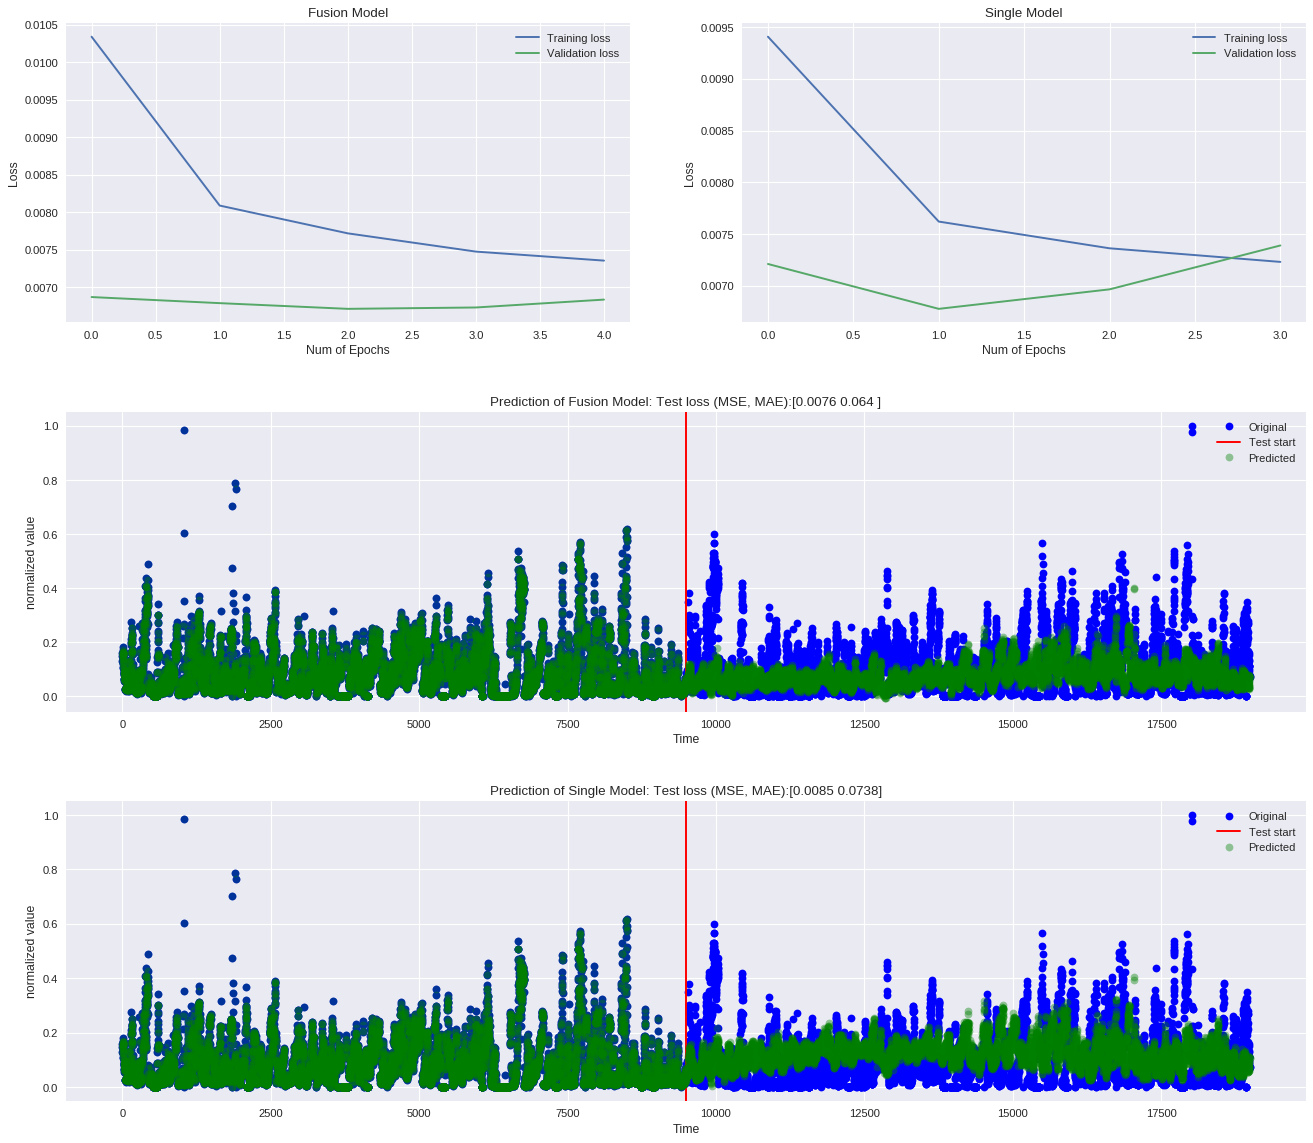

In [34]:
from keras.layers import Flatten
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Concatenate, Input, concatenate
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import EarlyStopping
import tensorflow as tf

n_train = 10000
n_test = 10000
batch_size=100

# train_X,train_y, test_X, test_y = create_data2(n_hours, n_train=n_train)

records1=10
stride1=24

records2=3
stride2=24*7

records3=2
stride3=24

train_X_1,train_y_1, test_X_1, test_y_1, data1 = create_data4(n_records=records1, 
                                               n_train=n_train,
                                               n_test=n_test,
                                               stride=stride1)
train_X_2,train_y_2, test_X_2, test_y_2, data2 = create_data4(n_records=records2, 
                                               n_train=n_train,
                                               n_test=n_test,
                                               stride=stride2)

train_X_3,train_y_3, test_X_3, test_y_3, data3 = create_data4(n_records=records3, 
                                               n_train=n_train,
                                               n_test=n_test,
                                               stride=stride3)

min_train_no = min(train_X_1.shape[0], train_X_2.shape[0],train_X_3.shape[0])
min_test_no = min(test_X_1.shape[0], test_X_2.shape[0],test_X_3.shape[0])

print(min_train_no)
train_X_1 = train_X_1[:min_train_no]
train_y_1 = train_y_1[:min_train_no]
test_X_1 = test_X_1[:min_test_no]
test_y_1 = test_y_1[:min_test_no]

train_X_2 = train_X_2[:min_train_no]
train_y_2 = train_y_2[:min_train_no]
test_X_2 = test_X_2[:min_test_no]
test_y_2 = test_y_2[:min_test_no]

train_X_3 = train_X_3[:min_train_no]
train_y_3 = train_y_3[:min_train_no]
test_X_3 = test_X_3[:min_test_no]
test_y_3 = test_y_3[:min_test_no]

n_train = min_train_no
n_test = min_test_no


# print(train_y_1[:10])
# print("========================")
# print(train_y_2[:10])


data_type = f"{records1}-{stride1}--{records2}-{stride2}--{records3}-{stride3}"
exp_name = "" + data_type
import os
if not os.path.exists(exp_name):
    os.makedirs(exp_name)
    
with open(exp_name+"/Data_type.txt", "w") as text_file:
    text_file.write("Data Type: "+data_type)    

inp1 = Input(shape=(train_X_1.shape[1], train_X_1.shape[2]))
inp2 = Input(shape=(train_X_2.shape[1], train_X_2.shape[2]))
inp3 = Input(shape=(train_X_3.shape[1], train_X_3.shape[2]))
 


x = LSTM(15)(inp1)
# x = Dense(3)(x)

y = LSTM(15)(inp2)
# y = Dense(3)(y)

z = LSTM(15)(inp3)
# z = Dense(3)(z)

w = concatenate([x, y, z])

# w =  Dense(5)(w)
out1 =  Dense(1, activation='linear')(w)

model1 = Model(inputs=[inp1, inp2, inp3], outputs=out1)

model1.compile(loss='mse',
        optimizer='adam',
        metrics=['mae'])

model1.name = 'Fusion Model'


# model1 = Model(inputs=inp1, outputs=out2)

# model1.compile(loss='mse',
#         optimizer='adam',
#         metrics=['mae'])

# model1.name = 'LSTM single data_create 3'

# model1.summary()

# model2 = create_model("lstm", "adam", "mse")
# model2.summary()

out2 = Dense(1, activation='linear')(x)


model2 = Model(inputs=inp1, outputs=out2)

model2.compile(loss='mse',
        optimizer='rmsprop',
        metrics=['mae'])

model2.name = 'Single Model'

# model2.summary()

EPOCHS = [20]*2

from keras.callbacks import CSVLogger,ModelCheckpoint

legends =['Training loss', 'Validation loss']
callback1 = [EarlyStopping(patience=2),
#                 ReduceLROnPlateau(patience=5, verbose=1),
#                 CSVLogger(filename='log.csv'),
#                 ModelCheckpoint('model1.check',
#                                 save_best_only=True,
#                                 save_weights_only=True)
           ]

callback2 = [EarlyStopping(patience=2),
#                 ReduceLROnPlateau(patience=5, verbose=1),
#                 CSVLogger(filename='log2.csv'),
#                 ModelCheckpoint('model2.check',
#                                 save_best_only=True,
#                                 save_weights_only=True)
            ]

from keras.utils import plot_model
plot_model(model1, to_file=exp_name+'/model1.png',show_shapes=True)
plot_model(model2, to_file=exp_name+'/model2.png',show_shapes=True)



print(f"############ {model1.name} ########################")



history1 = model1.fit([train_X_1,train_X_2,train_X_3], train_y_1, 
                    epochs=EPOCHS[0],
#                     batch_size=batch_size,
                    validation_split=0.2,
                    callbacks = callback1,
                    verbose=1, shuffle=True)

print(f"############ {model2.name} ########################")

history2 = model2.fit(train_X_1, train_y_1, 
                    epochs=EPOCHS[0],
#                     batch_size=batch_size,
                    validation_split=0.2,
                    callbacks = callback2,
                    verbose=1, shuffle=True)


# plot history
n_train = min_train_no
n_test = min_test_no



plt.figure(num=2, figsize=(20, 40), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(hspace=0.3,bottom=0.3)



ax1 = plt.subplot2grid((5,2),(0,0), colspan=1)
ax1.set_title(model1.name)

ax1.plot(history1.history['loss'], label='train')
ax1.set_xlabel("Num of Epochs")
ax1.set_ylabel("Loss")
ax1.legend(legends)

ax1.plot(history1.history['val_loss'], label='test')
ax1.set_xlabel("Num of Epochs")
ax1.set_ylabel("Loss")
ax1.legend(legends)


ax2 = plt.subplot2grid((5,2),(0,1), colspan=1)
ax2.set_title(model2.name)

ax2.plot(history2.history['loss'], label='train')
ax2.set_xlabel("Num of Epochs")
ax2.set_ylabel("Loss")
ax2.legend(legends)

ax2.plot(history2.history['val_loss'], label='test')
ax2.set_xlabel("Num of Epochs")
ax2.set_ylabel("Loss")
ax2.legend(legends)

test_loss1 = model1.evaluate([test_X_1, test_X_2, test_X_3], test_y_1)


test_loss2 = model2.evaluate(test_X_1, test_y_1)

test_loss1 = np.round(test_loss1, 4)
test_loss2 = np.round(test_loss2, 4)

print(model1.name, " test loss:",test_loss1)
print(model2.name, " test loss:",test_loss2)


c=pd.read_csv(github)
data=np.asarray(c)


test_predictions1 = model1.predict([test_X_1, test_X_2, test_X_3]).flatten()

ax3 = plt.subplot2grid((5,2),(1,0), colspan=2)

ax3.set_title(f"Prediction of {model1.name}: Test loss (MSE, MAE):{test_loss1}")
ax3.set_xlabel('Time')
ax3.set_ylabel('normalized value')
ax3.legend(('Original', 'Predicted'), loc='upper right')
ax3.plot(data[:n_train+n_test,0], 'bo')
ax3.axvline(x=n_train,color='r')
ax3.plot(np.concatenate([data[:n_train,0],test_predictions1[::-1]]), 'go', alpha=0.4)
ax3.legend(('Original','Test start', 'Predicted'), loc='upper right')


test_predictions2 = model2.predict(test_X_1).flatten()

ax4 = plt.subplot2grid((5,2),(2,0), colspan=2)

ax4.set_title(f"Prediction of {model2.name}: Test loss (MSE, MAE):{test_loss2}")
ax4.set_xlabel('Time')
ax4.set_ylabel('normalized value')
ax4.legend(('Original', 'Predicted'), loc='upper right')
ax4.plot(data[:n_train+n_test,0], 'bo')
ax4.axvline(x=n_train,color='r')
ax4.plot(np.concatenate([data[:n_train,0],test_predictions2[::-1]]), 'go', alpha=0.4)
ax4.legend(('Original','Test start', 'Predicted'), loc='upper right')

# ax5 = plt.subplot2grid((5,2),(3,0), colspan=2)
# ax5.text(0.0,0.0,get_model_summary(model1) , dict(size=12))

# ax6 = plt.subplot2grid((5,2),(4,0), colspan=2)
# ax6.text(0.0,0.0,get_model_summary(model2) , dict(size=12))

plt.savefig(exp_name+'/results.png')
plt.show()





In [0]:
from google.colab import files
files.download(exp_name+'/model1.png')